In [ ]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

file_loc=Path('/content/drive/MyDrive/crypto')
csv_list = ['ADA-USD.csv','BNB-USD.csv','BTC-USD.csv','CRO-USD.csv','DAI-USD.csv','DOGE-USD.csv',
            'ETH-USD.csv','LTC-USD.csv','LUNA1-USD.csv','SOL-USD.csv','TRX-USD.csv','XRP-USD.csv']
crypto_list = ['ADA','BNB','BTC','CRO','DAI','DOGE','ETH','LTC','LUNA','SOL','TRX','XRP']
crypto_df = pd.read_csv(file_loc/'ADA-USD.csv')
crypto_df['token'] = crypto_list[0]

temp_df = pd.DataFrame()

for i in range(1,len(csv_list)):
  temp_df = pd.read_csv(file_loc/str(csv_list[i]))
  temp_df['token'] = crypto_list[i]
  crypto_df = pd.concat([crypto_df,temp_df],axis=0)

crypto_df

,Date,Open,High,Low,Close,Adj Close,Volume,token
0,2020-12-31,0.184034,0.185749,0.176594,0.181397,0.181397,1132268397,ADA
1,2021-01-01,0.181382,0.184246,0.172022,0.175350,0.175350,1122218004,ADA
2,2021-01-02,0.175359,0.184253,0.169233,0.177423,0.177423,1408849504,ADA
3,2021-01-03,0.177382,0.208679,0.173376,0.204995,0.204995,2303857909,ADA
4,2021-01-04,0.205236,0.239661,0.194450,0.224762,0.224762,3260699086,ADA
...,...,...,...,...,...,...,...,...
424,2022-02-28,0.721931,0.788322,0.713188,0.782044,0.782044,3053923291,XRP
425,2022-03-01,0.782070,0.800635,0.761234,0.784862,0.784862,2877778057,XRP
426,2022-03-02,0.784876,0.784891,0.759598,0.768496,0.768496,2401047273,XRP
427,2022-03-03,0.768532,0.783925,0.738920,0.752185,0.752185,2213014779,XRP


0     2020-12-31
1     2021-01-01
2     2021-01-02
3     2021-01-03
4     2021-01-04
         ...    
424   2022-02-28
425   2022-03-01
426   2022-03-02
427   2022-03-03
428   2022-03-06
Name: Date, Length: 5148, dtype: datetime64[ns]


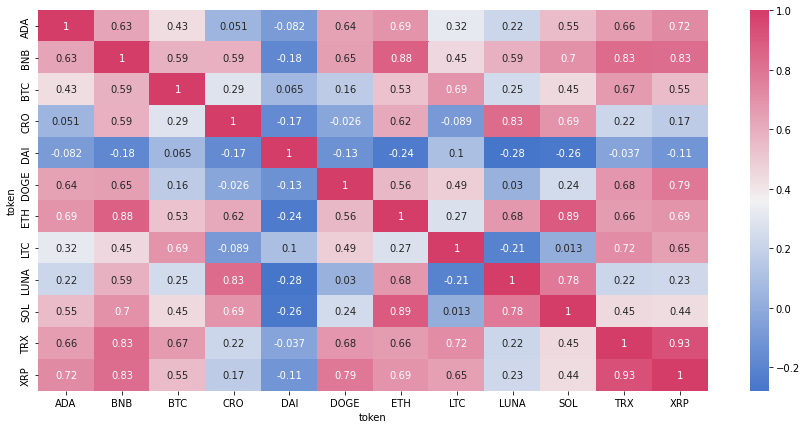

In [ ]:
crypto_df['Date'] = crypto_df['Date'].astype('datetime64[ns]')
print(crypto_df['Date'])
#crypto_df['Date'] = crypto_df['Date'].dt.strftime('%B %-d, %Y')

plt.figure(figsize=(15,7))
cmap = sns.diverging_palette(255, 0, as_cmap=True)

crypto_pivot2 = crypto_df.pivot(index = 'Date',columns = 'token', values = 'Close')

figgy = sns.heatmap(crypto_pivot2.corr(method='pearson'), cmap=cmap, annot=True)
  
  #st.write(figgy)

In [ ]:
crypto_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,token
0,2020-12-31,0.184034,0.185749,0.176594,0.181397,0.181397,1132268397,ADA
1,2021-01-01,0.181382,0.184246,0.172022,0.175350,0.175350,1122218004,ADA
2,2021-01-02,0.175359,0.184253,0.169233,0.177423,0.177423,1408849504,ADA
3,2021-01-03,0.177382,0.208679,0.173376,0.204995,0.204995,2303857909,ADA
4,2021-01-04,0.205236,0.239661,0.194450,0.224762,0.224762,3260699086,ADA


          Date      Open      High       Low     Close  Adj Close      Volume  \
395 2022-01-30  0.617006  0.622546  0.599771  0.603181   0.603181   870878596   
396 2022-01-31  0.603063  0.622314  0.582848  0.619149   0.619149  1266538239   
397 2022-02-01  0.619006  0.630317  0.613050  0.629233   0.629233  1183031072   
398 2022-02-02  0.629240  0.630695  0.599138  0.601483   0.601483  1182736030   
399 2022-02-03  0.601415  0.607684  0.592349  0.607684   0.607684  1042290345   

    token  
395   XRP  
396   XRP  
397   XRP  
398   XRP  
399   XRP  


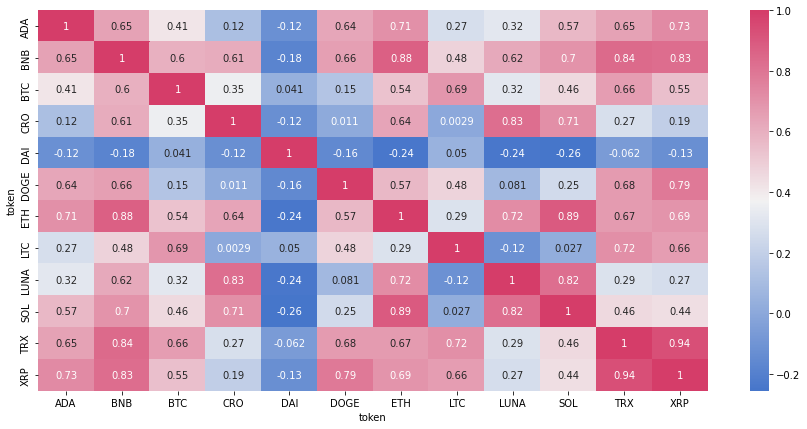

In [ ]:
crypto_30 = crypto_df[crypto_df['Date'] < '2022-02-04' ]
print(crypto_30.tail())

plt.figure(figsize=(15,7))
cmap = sns.diverging_palette(255, 0, as_cmap=True)

crypto_pivot30 = crypto_30.pivot(index = 'Date',columns = 'token', values = 'Close')

figgy = sns.heatmap(crypto_pivot30.corr(method='pearson'), cmap=cmap, annot=True)

          Date      Open      High       Low     Close  Adj Close      Volume  \
365 2021-12-31  0.839681  0.852940  0.805765  0.831163   0.831163  1736939791   
366 2022-01-01  0.831281  0.853198  0.830741  0.849472   0.849472  1156464024   
367 2022-01-02  0.849442  0.863558  0.839157  0.859118   0.859118  1134033205   
368 2022-01-03  0.859107  0.859107  0.824052  0.832885   0.832885  1428968710   
369 2022-01-04  0.832851  0.844076  0.819615  0.824673   0.824673  1514079366   

    token  
365   XRP  
366   XRP  
367   XRP  
368   XRP  
369   XRP  


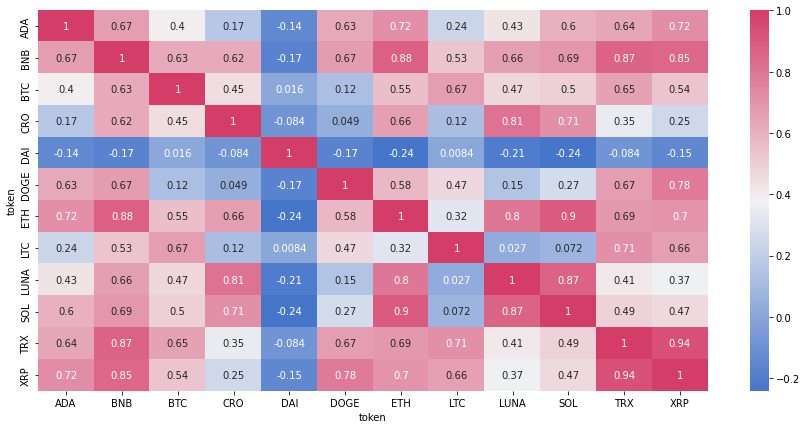

In [ ]:
crypto_60 = crypto_df[crypto_df['Date'] < '2022-01-05' ]
print(crypto_60.tail())

plt.figure(figsize=(15,7))
cmap = sns.diverging_palette(255, 0, as_cmap=True)

crypto_pivot60 = crypto_60.pivot(index = 'Date',columns = 'token', values = 'Close')

figgy = sns.heatmap(crypto_pivot60.corr(method='pearson'), cmap=cmap, annot=True)

          Date      Open      High       Low     Close  Adj Close      Volume  \
335 2021-12-01  0.998190  1.018269  0.982023  0.990930   0.990930  2570587577   
336 2021-12-02  0.990915  0.990915  0.959877  0.972312   0.972312  2250871711   
337 2021-12-03  0.973453  0.985320  0.905968  0.922244   0.922244  2714612022   
338 2021-12-04  0.924092  0.926664  0.614505  0.847029   0.847029  6970805726   
339 2021-12-05  0.846709  0.863775  0.780400  0.805595   0.805595  3553480780   

    token  
335   XRP  
336   XRP  
337   XRP  
338   XRP  
339   XRP  


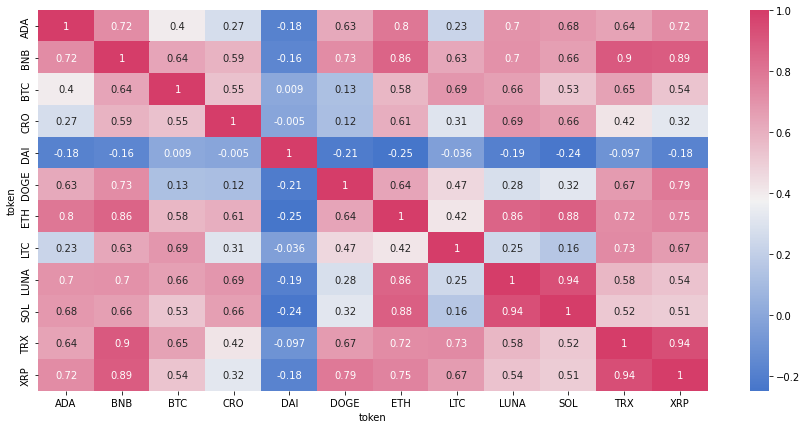

In [ ]:
crypto_90 = crypto_df[crypto_df['Date'] < '2021-12-06' ]
print(crypto_90.tail())

plt.figure(figsize=(15,7))
cmap = sns.diverging_palette(255, 0, as_cmap=True)

crypto_pivot90 = crypto_90.pivot(index = 'Date',columns = 'token', values = 'Close')

figgy = sns.heatmap(crypto_pivot90.corr(method='pearson'), cmap=cmap, annot=True)


         Date      Open      High       Low     Close  Adj Close      Volume  \
60 2021-03-01  0.415109  0.451348  0.413587  0.447244   0.447244  3547533777   
61 2021-03-02  0.446496  0.454764  0.424843  0.436837   0.436837  3388591213   
62 2021-03-03  0.436903  0.466652  0.433526  0.450279   0.450279  3304301858   
63 2021-03-04  0.450060  0.493142  0.438003  0.486605   0.486605  6027421637   
64 2021-03-05  0.485831  0.485831  0.449948  0.458119   0.458119  4288262516   

   token  
60   XRP  
61   XRP  
62   XRP  
63   XRP  
64   XRP  


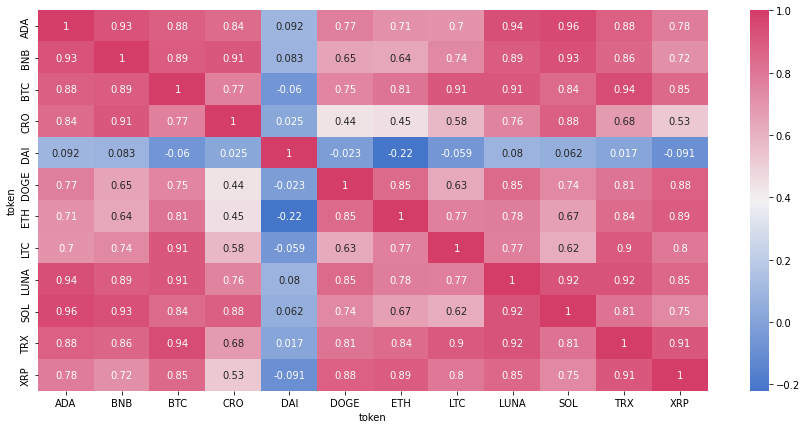

In [ ]:
crypto_365 = crypto_df[crypto_df['Date'] < '2021-03-06' ]
print(crypto_365.tail())

plt.figure(figsize=(15,7))
cmap = sns.diverging_palette(255, 0, as_cmap=True)

crypto_pivot365 = crypto_365.pivot(index = 'Date',columns = 'token', values = 'Close')

figgy = sns.heatmap(crypto_pivot365.corr(method='pearson'), cmap=cmap, annot=True)


In [ ]:
crypto_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,token
424,2022-02-28,0.721931,0.788322,0.713188,0.782044,0.782044,3053923291,XRP
425,2022-03-01,0.782070,0.800635,0.761234,0.784862,0.784862,2877778057,XRP
426,2022-03-02,0.784876,0.784891,0.759598,0.768496,0.768496,2401047273,XRP
427,2022-03-03,0.768532,0.783925,0.738920,0.752185,0.752185,2213014779,XRP
428,2022-03-06,0.755771,0.757829,0.730040,0.734885,0.734885,1765211008,XRP
